In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopy as gp
from matplotlib import rcParams

Loading dataframes from clean folder and assigning them to variables

In [34]:
acs_income = pd.read_csv('../data/clean/acs_income.csv')
rental_prices = pd.read_csv('../data/clean/nyc_rental_prices.csv')
zhome_value = pd.read_csv('../data/clean/zhome_value.csv')
airbnb = pd.read_csv('../data/clean/inside_airbnb_clean.gz')

Inspecting columns for each dataframe

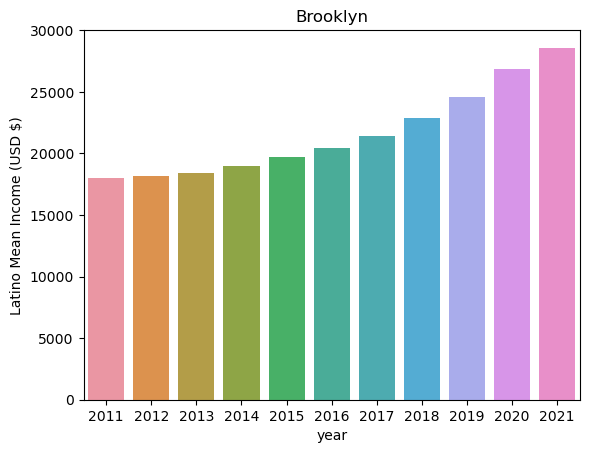

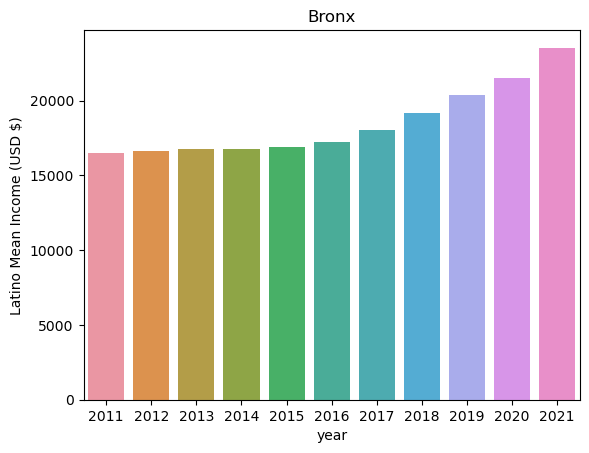

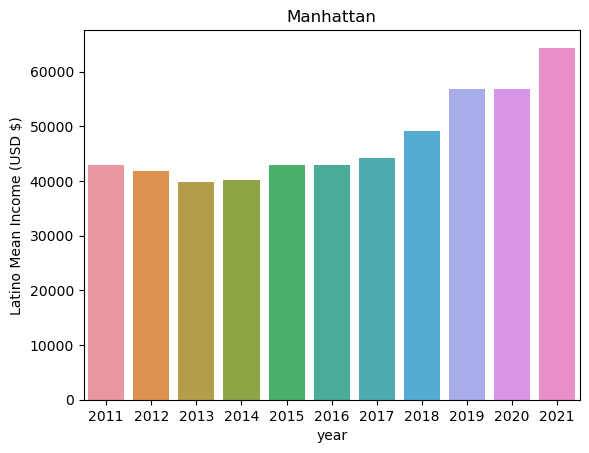

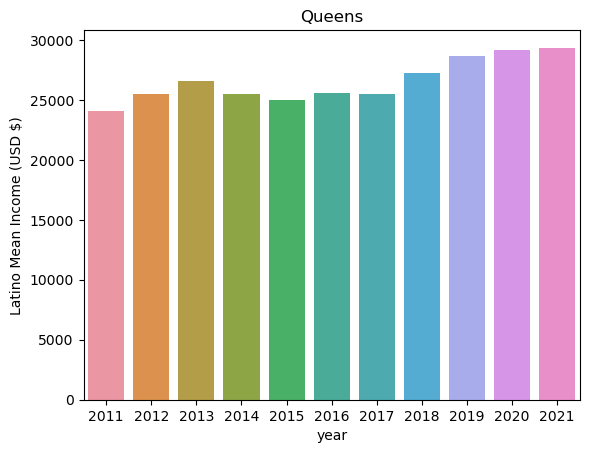

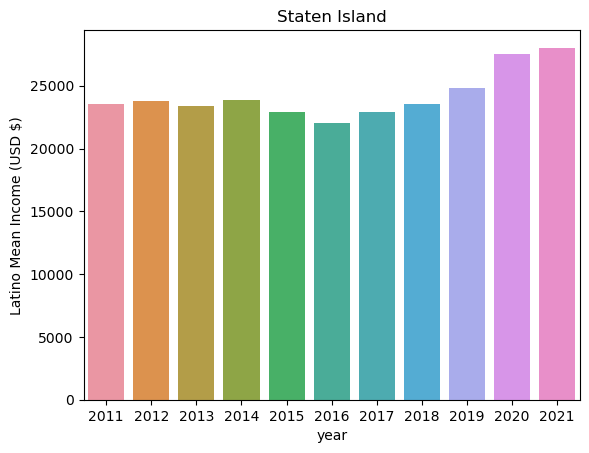

In [35]:
acs_boro = acs_income.groupby(['borough','year'])[['latino_mean_income','african_american_mean_income','white_mean_income']].mean().reset_index()
ax = sns.barplot(data=acs_boro[acs_boro['borough']=='Brooklyn'], x="year", y="latino_mean_income")
ax.set_title('Brooklyn')
ax.set_ylabel('Latino Mean Income (USD $)')
plt.show()
ax = sns.barplot(data=acs_boro[acs_boro['borough']=='Bronx'], x="year", y="latino_mean_income")
ax.set_title('Bronx')
ax.set_ylabel('Latino Mean Income (USD $)')
plt.show()
ax = sns.barplot(data=acs_boro[acs_boro['borough']=='Manhattan'], x="year", y="latino_mean_income")
ax.set_title('Manhattan')
ax.set_ylabel('Latino Mean Income (USD $)')
plt.show()
ax = sns.barplot(data=acs_boro[acs_boro['borough']=='Queens'], x="year", y="latino_mean_income")
ax.set_title('Queens')
ax.set_ylabel('Latino Mean Income (USD $)')
plt.show()
ax = sns.barplot(data=acs_boro[acs_boro['borough']=='Staten_Island'], x="year", y="latino_mean_income")
ax.set_title('Staten Island')
ax.set_ylabel('Latino Mean Income (USD $)')
plt.show()

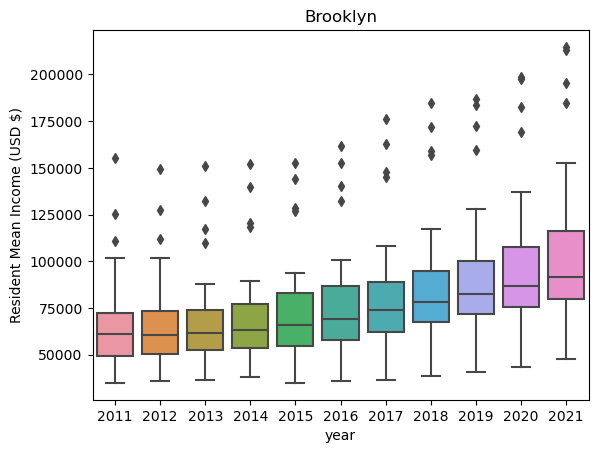

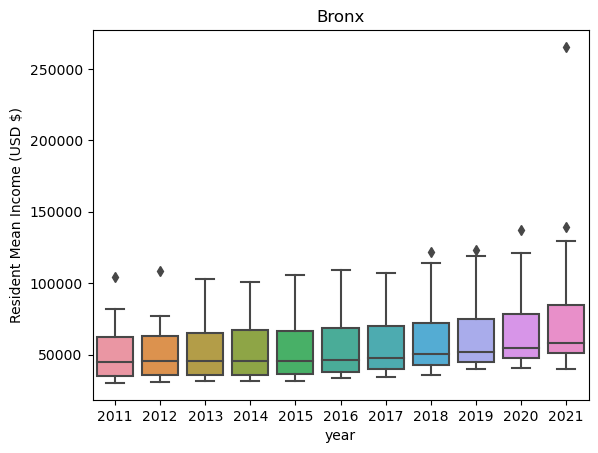

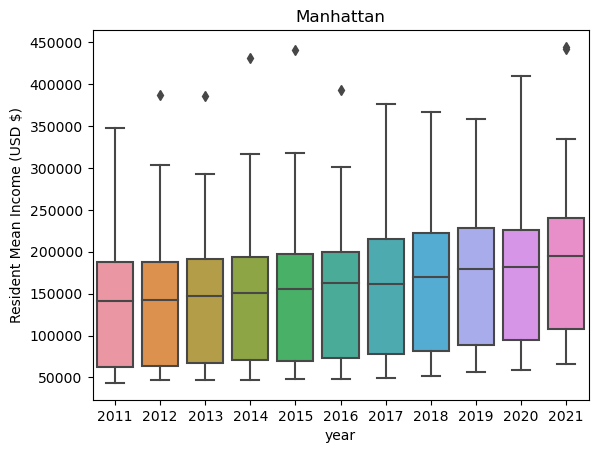

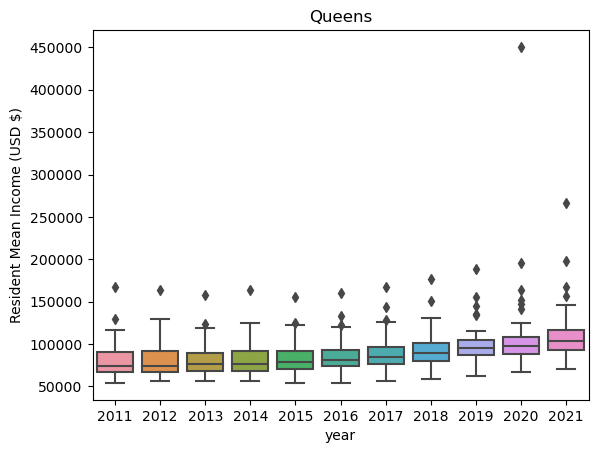

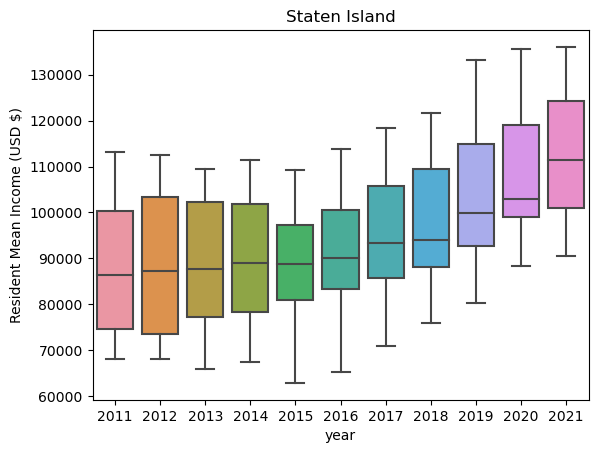

In [36]:
ax = sns.boxplot(data=acs_income[acs_income['borough']=='Brooklyn'], x='year', y='households_s1901_mean_income')
ax.set_title('Brooklyn')
ax.set_ylabel('Resident Mean Income (USD $)')
plt.show()

ax = sns.boxplot(data=acs_income[acs_income['borough']=='Bronx'], x='year', y='households_s1901_mean_income')
ax.set_title('Bronx')
ax.set_ylabel('Resident Mean Income (USD $)')
plt.show()

ax = sns.boxplot(data=acs_income[acs_income['borough']=='Manhattan'], x='year', y='households_s1901_mean_income')
ax.set_title('Manhattan')
ax.set_ylabel('Resident Mean Income (USD $)')
plt.show()

ax = sns.boxplot(data=acs_income[acs_income['borough']=='Queens'], x='year', y='households_s1901_mean_income')
ax.set_title('Queens')
ax.set_ylabel('Resident Mean Income (USD $)')
plt.show()

ax = sns.boxplot(data=acs_income[acs_income['borough']=='Staten_Island'], x='year', y='households_s1901_mean_income')
ax.set_title('Staten Island')
ax.set_ylabel('Resident Mean Income (USD $)')
plt.show()


In [37]:
acs_boro = acs_boro.rename(columns={'latino_mean_income':'latino',
                                    'white_mean_income':'white',
                                    'african_american_mean_income':'african_american'})

data = acs_boro.melt(['borough','year'], var_name='race', value_name='mean_income')

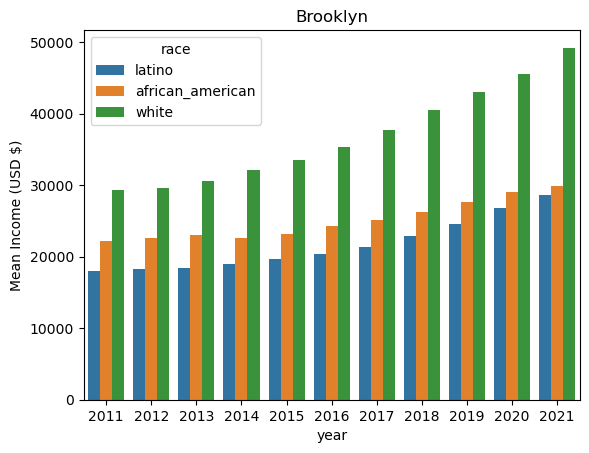

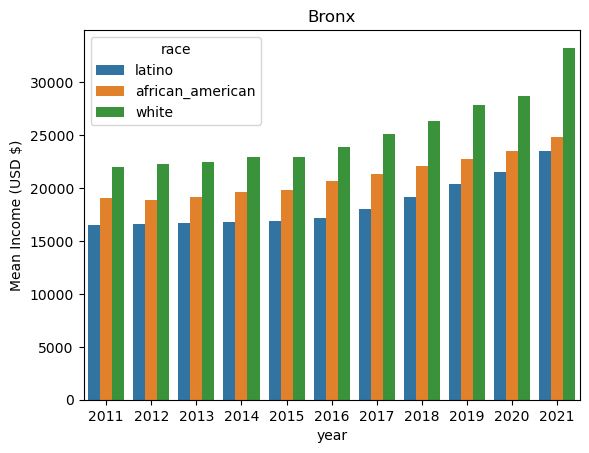

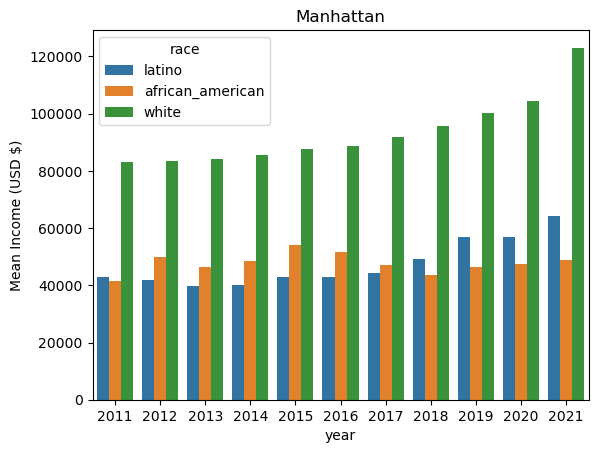

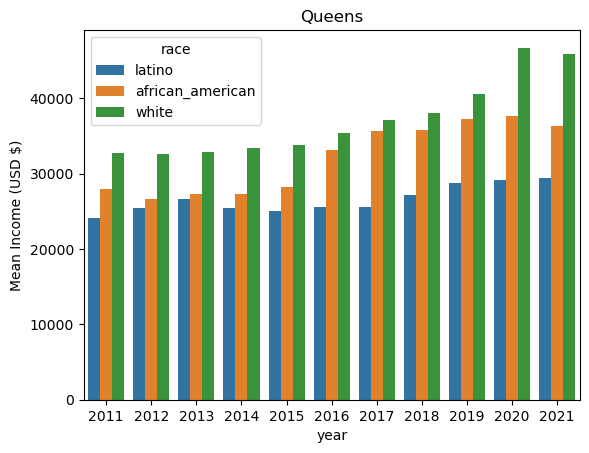

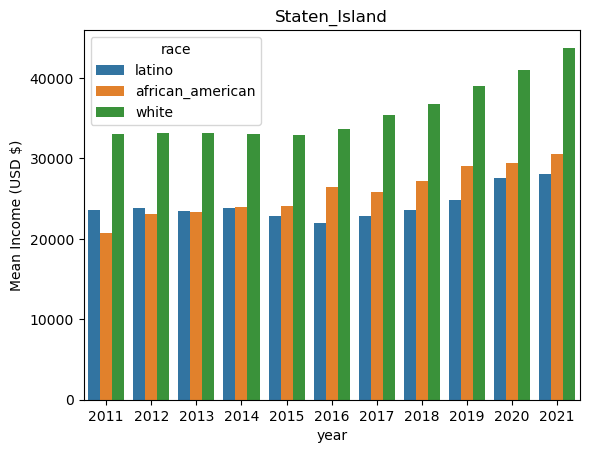

In [38]:
ax = sns.barplot(data=data[data['borough']=='Brooklyn'], x='year',y='mean_income',hue='race')
ax.set_title('Brooklyn')
ax.set_ylabel('Mean Income (USD $)')
plt.show()

ax = sns.barplot(data=data[data['borough']=='Bronx'], x='year',y='mean_income',hue='race')
ax.set_title('Bronx')
ax.set_ylabel('Mean Income (USD $)')
plt.show()

ax = sns.barplot(data=data[data['borough']=='Manhattan'], x='year',y='mean_income',hue='race')
ax.set_title('Manhattan')
ax.set_ylabel('Mean Income (USD $)')
plt.show()

ax = sns.barplot(data=data[data['borough']=='Queens'], x='year',y='mean_income',hue='race')
ax.set_title('Queens')
ax.set_ylabel('Mean Income (USD $)')
plt.show()

ax = sns.barplot(data=data[data['borough']=='Staten_Island'], x='year',y='mean_income',hue='race')
ax.set_title('Staten_Island')
ax.set_ylabel('Mean Income (USD $)')
plt.show()


Let's Play Around


In [28]:
# Get yearly NYC median average for column `value`
def get_nyc_data(df, value):
    nyc_data = df.groupby(["year"])[value].mean().to_frame().reset_index()
    nyc_data["borough"] = "NYC"
    return nyc_data

# Gets yearly sorty data for any borough based on column `value`
def extract_yearly_sorted_data(df, boro, value):
    return df[df["borough"] == boro][[value, "year", "borough" ]].reset_index(drop=True)

# Create delta column for any data frame column
def create_delta_col(df, value):
    delta_col = value + "_delta"
    df[delta_col] = df[value].diff().replace(np.nan, 0).astype("int")
    return df.drop(columns=[value]).reset_index(drop=True)

In [29]:
# COMPUTATION FUNCTIONS

# Compute yearly delta for NYC
def compute_nyc_delta(df, value):
    data = get_nyc_data(df, value)
    return create_delta_col(data, value)

# Compute yearly delta for any boro based on column `value`
def compute_boro_delta(df, boro, value):
    data = extract_yearly_sorted_data(df, boro, value)
    return create_delta_col(data, value)

# Create delta df for all boros
def compute_all_boros_delta(df, delta_metric):
    boros = df["borough"].unique()
    boros_delta = pd.DataFrame()
    for boro in boros:
        boros_delta = pd.concat([boros_delta, compute_boro_delta(df, boro, delta_metric)])
    return boros_delta

In [30]:
# HELPER FUNCTIONS

# Get color palette based on delta value
def get_delta_colors(delta_list):
    return ["#8CD47E" if i > 0.0 else "#FF6961" for i in delta_list]

# Set annotations for values on bar
def set_bar_annotations(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),\
        (p.get_x() + p.get_width() / 2,\
        p.get_height()), ha='center', va='center',\
        xytext=(0, 8),\
        textcoords='offset points')

# Extracts labeled delta column by removing year and borough from columns list copy
def get_delta_column(columns):
    delta_column = list(columns)
    delta_column.remove("year")
    delta_column.remove("borough")
    return delta_column[0]

def format_label(unformatted_title):
    return unformatted_title.upper().replace("_", " ")
    

In [31]:
# COMPUTATION FUNCTIONS

# Map chart for FacetGrid
def map_delta(data, color):
    df = pd.DataFrame(data)
    
    delta_column = get_delta_column(df.columns.to_list())
    df[delta_column] = df[delta_column].div(1000).round(2)
    
    chart = sns.barplot(x=df["year"], y=df[delta_column], palette=get_delta_colors(df[delta_column].to_list()))
    
    # Format Chart
    set_bar_annotations(chart.axes)
    chart.figure.set_size_inches((6,12))
    chart.axes.tick_params(axis='x', rotation=90)
    chart.axes.set_ylabel("delta (thousands)")
    title = 'yearly {} for {}'.format(delta_column, df["borough"].unique()[0])
    chart.axes.set_title(format_label(title))

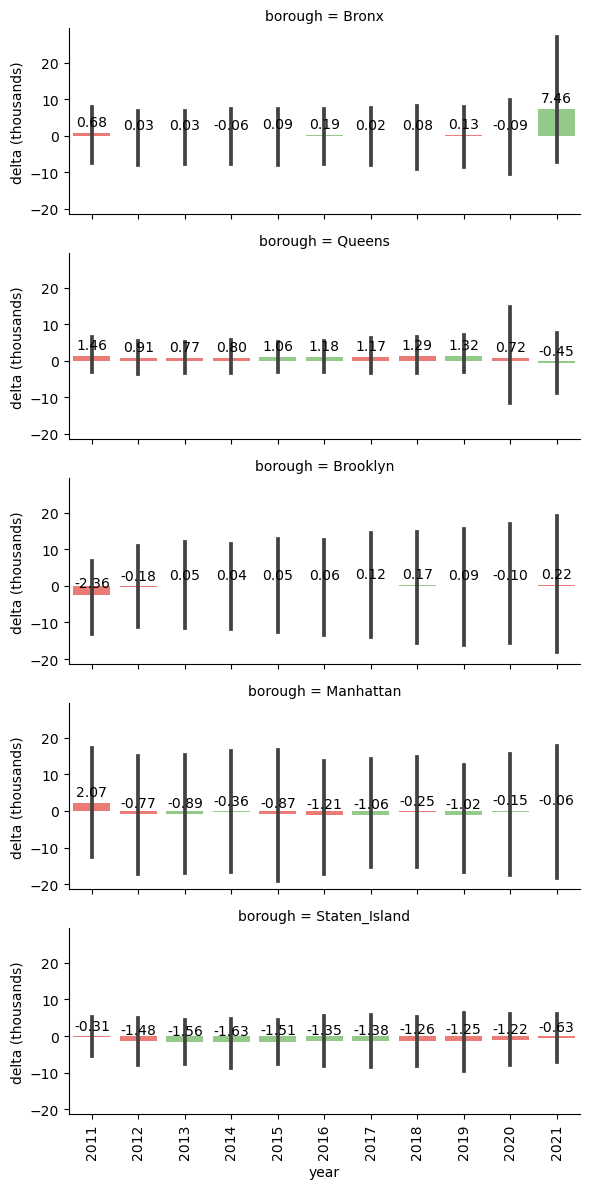

In [32]:
delta_metric = "households_s1901_mean_income"
df = acs_income
# Get data for boros and NYC
boros_delta = compute_all_boros_delta(df, delta_metric)
nyc_delta = compute_nyc_delta(df, delta_metric)

g = sns.FacetGrid(boros_delta, row="borough")

# Get data for boros
g.map_dataframe(map_delta)

In [24]:
acs_boro = acs_boro.rename(columns={'latino_mean_income':'latino','white_mean_income':'white','african_american_mean_income':'african_american'})

<AxesSubplot:xlabel='borough', ylabel='mean_income'>

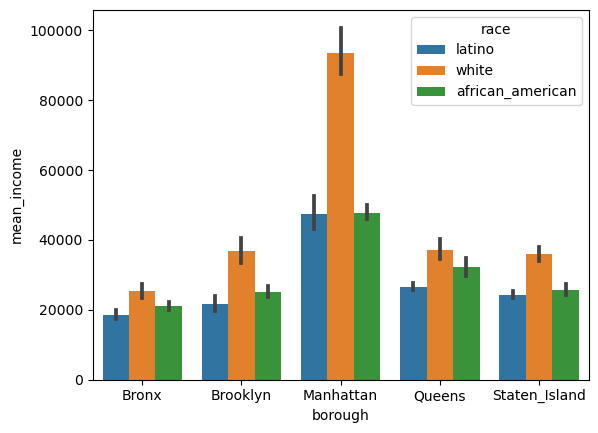

In [19]:
sns.barplot(data=data,x='borough',y='mean_income',hue='race')

In [ ]:
sns.boxplot(data=manhattan, x='year', y='latino_mean_income')

In [ ]:
sns.boxplot(data=brooklyn, x='year', y='latino_mean_income')

In [ ]:
sns.boxplot(data=manhattan, x='year', y='white_mean_income')

In [ ]:
sns.boxplot(data=brooklyn, x='year', y='white_mean_income')